<h1><center>Natural Language Processing</center></h1>

<h3><center>NLP 10</center></h3>

![hM0xGrmJw](https://miro.medium.com/max/720/1*PGB0w1JZslqA-hM0xGrmJw.gif)

# Topics
1.	Introduction to Natural Language Processing
2.	Why learn NLP?
3.	Let's start playing with Python!
4.	Text Wrangling and Cleansing
 - Sentence splitter
 - Tokenization
 - Stemming         
 - Lemmatization    
 - Stop word removal
 - Diving into NLTK
5.	Vectorizing with Python
 - Count Vectorizer 
 - TF-IDF Vectorizer
6.	Modelling with Python 
 - Classification <---------------------------------------------------- **This is where we are**
 - Clustering
 - Sentiment Analysis 


In [1]:
import pandas as pd
df = pd.read_csv('SPAM text.csv')

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Labelled vs Unlabelled

You will find 2 types of datasets out and about in the wild.
1. Labelled data
2. Unlabelled data

## Unlabelled 
When you are dealing with data, that does not has any category/label attached to the rows, this is called unlabelled data.

Here is an example. 

Imagine if this was your dataset

In [2]:
df[['Message']]

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


This is Unlabelled data

## Labelled 
When you are dealing with data, that has category/label attached to all the rows, this is called labelled data.

Here is an example.

Imagine if this was your dataset

In [3]:
df[['Message','Category']]

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


# Train-test split

When we are training our ML models. We train them on our dataset. But, we need a way for us to check if our models are correct or not. 
- For this to work, we need to set-aside some of our data, that we can use later.
- We do not use this set-aside data for training the model.
- Once the model is trained, we ask it to predict on this set-aside data.
- Now remember, we know internally what this set-aside data's real value is.
- But we let the model make it's predictions
- Now, since we have the model predictions and also the real values. 

We can compare both to get 
- Accuracy
- True Positive
- True Negative
- False Positive
- False Negative

In [4]:
from sklearn.model_selection import train_test_split

In [42]:
df_x = df['Message']

In [43]:
df_x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [44]:
df_y = df['Category']

In [161]:
df_y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [114]:
train_test_split(df_x, df_y, test_size=0.2)

[3385    FREE MSG:We billed your mobile number by mista...
 5538    I can't believe how attached I am to seeing yo...
 188     Please call our customer service representativ...
 1557    Good sleep is about rhythm. The person has to ...
 1859                     Sir, i am waiting for your call.
                               ...                        
 2420    SMS SERVICES For your inclusive text credits p...
 5469                                              Ok lor.
 1946    Can ü call me at 10:10 to make sure dat i've w...
 2869             Aight, tomorrow around  &lt;#&gt;  it is
 380     I taught that Ranjith sir called me. So only i...
 Name: Message, Length: 4457, dtype: object,
 4536                        IM LATE TELLMISS IM ON MY WAY
 1832    Hello- thanx for taking that call. I got a job...
 2873                                       See you there!
 521        But that's on ebay it might be less elsewhere.
 174     Bloody hell, cant believe you forgot my surnam...
           

In [130]:
train_test_split(df_x, df_y, test_size=0.33, random_state=42)

[3235                                  Yup ü not comin :-(
 945     I sent my scores to sophas and i had to do sec...
 5319                         Kothi print out marandratha.
 5528    Its just the effect of irritation. Just ignore it
 247                        I asked you to call him now ok
                               ...                        
 3772    Hi, wlcome back, did wonder if you got eaten b...
 5191                               Sorry, I'll call later
 5226        Prabha..i'm soryda..realy..frm heart i'm sory
 5390                           Nt joking seriously i told
 860               Did he just say somebody is named tampa
 Name: Message, Length: 3733, dtype: object,
 3245    Squeeeeeze!! This is christmas hug.. If u lik ...
 944     And also I've sorta blown him off a couple tim...
 1044    Mmm thats better now i got a roast down me! i...
 2484        Mm have some kanji dont eat anything heavy ok
 812     So there's a ring that comes with the guys cos...
           

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [137]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [49]:
X_train

3235                                  Yup ü not comin :-(
945     I sent my scores to sophas and i had to do sec...
5319                         Kothi print out marandratha.
5528    Its just the effect of irritation. Just ignore it
247                        I asked you to call him now ok
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 3733, dtype: object

In [50]:
X_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
4944    Check mail.i have mailed varma and kept copy t...
3313    I know you are serving. I mean what are you do...
3652         Want to send me a virtual hug?... I need one
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
4758    hey, looks like I was wrong and one of the kap...
Name: Message, Length: 1839, dtype: object

In [51]:
y_train

3235    ham
945     ham
5319    ham
5528    ham
247     ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: Category, Length: 3733, dtype: object

In [52]:
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4944    ham
3313    ham
3652    ham
14      ham
4758    ham
Name: Category, Length: 1839, dtype: object

# Confusion Matrix
Plotting these 4, gives us 'Confusion Matrix'
- True Positive
- True Negative
- False Positive
- False Negative

In [139]:
#Let's say these are our predictions
prediction = [0,1,0,0]
real_values = [1,1,0,1]

In [140]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(real_values, prediction)

array([[1, 0],
       [2, 1]])

In [143]:
cm = confusion_matrix(real_values, prediction)

In [144]:
cm

array([[1, 0],
       [2, 1]])

<AxesSubplot:>

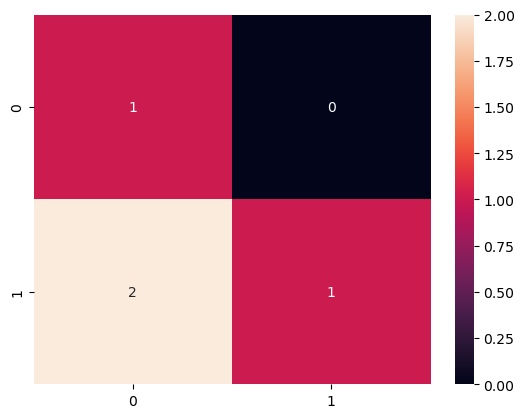

In [147]:
sns.heatmap(cm, annot=True)

# Splitting on actual data

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

# We initialise it
vectorizer = CountVectorizer()

vectorizer.fit(X_train)

CountVectorizer()

In [150]:
vectorizer.transform(X_train)

<3733x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 49971 stored elements in Compressed Sparse Row format>

In [163]:
vectorizer.get_feature_names_out()[100:200]

array(['08712402050', '08712402578', '08712402779', '08712402902',
       '08712402972', '08712405020', '08712405022', '08712460324',
       '0871277810710p', '0871277810810', '0871277810910p', '08714342399',
       '087147123779am', '08714712379', '08714712388', '08714712394',
       '08714712412', '08715203028', '08715203649', '08715203656',
       '08715203677', '08715203694', '08715205273', '08715500022',
       '08715705022', '08717111821', '0871750', '08717507382',
       '08717509990', '08717895698', '08717898035', '08718711108',
       '08718720201', '08718723815', '08718726270', '087187262701',
       '08718726970', '08718726978', '08718727870', '08718730666',
       '08718738001', '08718738002', '08718738034', '08719181259',
       '08719181503', '08719181513', '08719839835', '08719899229',
       '08719899230', '09', '09041940223', '09050000301', '09050000332',
       '09050000555', '09050000878', '09050001295', '09050001808',
       '09050003091', '09050090044', '0905624215

In [153]:
X_train_vector = vectorizer.transform(X_train)

In [154]:
vectorizer.transform(X_test)

<1839x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 22307 stored elements in Compressed Sparse Row format>

In [160]:
X_test_vector = vectorizer.transform(X_test)

# X_train_vector
# X_test_vector
# y_train_encoded
# y_test_encoded

# Encoding the categories

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
y_train

3235    ham
945     ham
5319    ham
5528    ham
247     ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: Category, Length: 3733, dtype: object

In [70]:
le.fit(y_train)

LabelEncoder()

In [156]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [157]:
le.transform(y_train)

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
y_train_encoded = le.transform(y_train)

In [159]:
y_test_encoded = le.transform(y_test)

# Finally training the model

In [164]:
from sklearn.linear_model import LogisticRegression

In [166]:
# Initialising
lr=LogisticRegression()

In [167]:
#Fitting the model for Bag of words
lr_model = lr.fit(X_train_vector,y_train_encoded)

In [168]:
print(lr_model)

LogisticRegression()


In [169]:
#Predicting the model for bag of words
lr.predict(X_test_vector)

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
lr_model_predicted = lr.predict(X_test_vector)

In [172]:
lr_model_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [174]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test_encoded,lr_model_predicted)

0.9853181076672104

In [176]:
lr_model_score = accuracy_score(y_test_encoded,lr_model_predicted)

In [177]:
print("lr_bow_score :",lr_model_score)

lr_bow_score : 0.9853181076672104


# But wait, there's more

In [178]:
cm_model = confusion_matrix(y_test_encoded,lr_model_predicted)

In [179]:
cm_model

array([[1590,    3],
       [  24,  222]])

<AxesSubplot:>

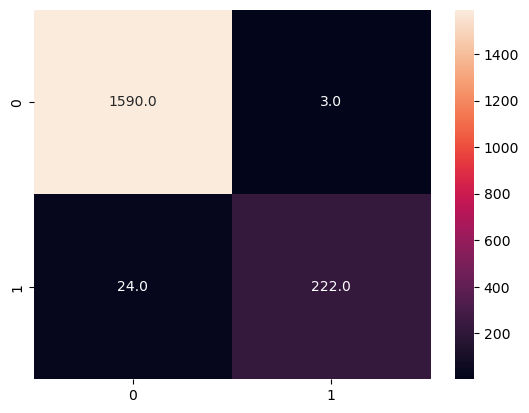

In [180]:
sns.heatmap(cm_model, annot=True, fmt=".1f")

# What does this mean ??

In [200]:
# Let's write some text
ourtext = ['Sale, are you interested in buying the new galaxy watch. 50% off on this new offer.']

In [184]:
vectorizer.transform(ourtext)

<1x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [185]:
ourtext_vector = vectorizer.transform(ourtext)

In [186]:
lr.predict(ourtext_vector)

array([0])

In [204]:
df[df['Category'] == 'spam'].iloc[0,1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# Testing


In [203]:
ournewtext = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [205]:
vectorizer.transform(ournewtext)

<1x7081 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [207]:
ournewtext_vector = vectorizer.transform(ournewtext)

In [208]:
lr.predict(ournewtext_vector)

array([1])